In [0]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
files.upload()

Saving ratings_Electronics.csv to ratings_Electronics.csv


KeyboardInterrupt: ignored

In [0]:
colnames = ['userId','productId','ratings','timestamp']
electronics = pd.read_csv('ratings_Electronics.csv', sep=',',names=colnames)

In [0]:
electronics = electronics.head(10000)

In [7]:
electronics.shape

(10000, 4)

In [0]:
rating_range =electronics['ratings'].unique()

In [9]:
sorted(rating_range)

[1.0, 2.0, 3.0, 4.0, 5.0]

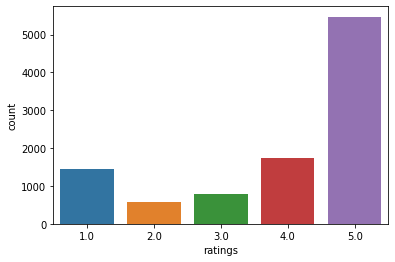

In [11]:
import seaborn as sns
sns.countplot(electronics['ratings'])

In [0]:
electronics = electronics.drop('timestamp',axis=1)

In [0]:
electronics.head(10)

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
5,A1QGNMC6O1VW39,0511189877,5.0
6,A3J3BRHTDRFJ2G,0511189877,2.0
7,A2TY0BTJOTENPG,0511189877,5.0
8,A34ATBPOK6HCHY,0511189877,5.0
9,A89DO69P0XZ27,0511189877,5.0


In [0]:
electronics.isna().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [0]:
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
userId       10000 non-null object
productId    10000 non-null object
ratings      10000 non-null float64
dtypes: float64(1), object(2)
memory usage: 234.5+ KB


In [0]:
electronics = electronics.dropna()

In [0]:
electronics.shape

(10000, 3)

In [0]:
#electronics_filtered = electronics[electronics['ratings'] >= 5.0]

In [0]:
#electronics_filtered.shape

(5473, 3)

In [0]:
#Building  popularity   based model.
electronics_grouped = electronics.groupby('productId')['ratings'].mean()

In [0]:
electronics_grouped.head()

productId
0132793040    5.000000
0321732944    5.000000
0439886341    1.666667
0511189877    4.500000
0528881469    2.851852
Name: ratings, dtype: float64

In [0]:
ratings_unique = electronics['ratings'].unique()
ratings_unique

array([5., 1., 3., 2., 4.])

In [0]:
electronics_sorted = electronics.groupby('productId')['ratings'].mean().sort_values(ascending=False)
electronics_sorted.head()

productId
0132793040    5.0
9984953157    5.0
9984977234    5.0
9984976866    5.0
787988002X    5.0
Name: ratings, dtype: float64

In [0]:
ratings_mean_count = pd.DataFrame(electronics_grouped)

In [0]:
ratings_mean_count.head()

,ratings
productId,
0132793040,5.000000
0321732944,5.000000
0439886341,1.666667
0511189877,4.500000
0528881469,2.851852


In [0]:
ratings_mean_count['rating_counts'] = pd.DataFrame(electronics.groupby('productId')['ratings'].count())

In [0]:
ratings_mean_count.head()

,ratings,rating_counts
productId,,
0132793040,5.000000,1
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27


In [0]:
ratings_mean_count = ratings_mean_count.sort_values('rating_counts',ascending = 0)
ratings_mean_count.head()

,ratings,rating_counts
productId,,
0972683275,4.470980,1051
1400532655,3.727273,484
140053271X,3.900232,431
B00000DM9W,4.593373,332
B00000J061,4.030534,262


In [0]:
pip install surprise

In [0]:
from surprise import Reader, Dataset

In [0]:
reader = Reader()
data = Dataset.load_from_df(electronics[['userId', 'productId', 'ratings']], reader)

In [0]:
from surprise.model_selection import train_test_split
trainset,testset = train_test_split(data,test_size=0.3,random_state=1)

In [0]:
#collaborative filtering user-user
from surprise import KNNWithMeans
from surprise import accuracy

In [0]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [0]:
test_pred = algo.test(testset)

In [0]:
test_pred

[Prediction(uid='A20CJJU5IKA6T2', iid='B00000DM9W', r_ui=5.0, est=3.937, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3K8JJP3O9N9A7', iid='998504780X', r_ui=1.0, est=3.937, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2NO1BRFL4TD5D', iid='9985674170', r_ui=5.0, est=3.937, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2LZ3HGE6UMSQF', iid='B000001OMA', r_ui=5.0, est=3.937, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AHKKH5P9OXXMG', iid='0972683275', r_ui=5.0, est=3.937, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A14W7Y09LG6AK', iid='0979526191', r_ui=2.0, est=3.937, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2ITS3FO21AYA3', iid='B00000DMA3', r_ui=5.0, est=3.937, details={'was_impossible': True, 'r

In [0]:
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.4715


1.4714819183394678

In [0]:
from collections import defaultdict

In [0]:
trainset.ur

defaultdict(list,
            {0: [(0, 3.0)],
             1: [(1, 4.0)],
             2: [(2, 2.0)],
             3: [(3, 5.0)],
             4: [(4, 5.0)],
             5: [(5, 4.0)],
             6: [(6, 5.0)],
             7: [(7, 1.0)],
             8: [(7, 1.0)],
             9: [(8, 1.0)],
             10: [(9, 5.0)],
             11: [(6, 3.0)],
             12: [(10, 5.0)],
             13: [(11, 5.0)],
             14: [(12, 1.0)],
             15: [(13, 5.0)],
             16: [(14, 5.0)],
             17: [(15, 1.0)],
             18: [(16, 5.0)],
             19: [(17, 5.0)],
             20: [(18, 1.0)],
             21: [(19, 4.0)],
             22: [(20, 5.0)],
             23: [(6, 5.0)],
             24: [(21, 5.0)],
             25: [(22, 5.0)],
             26: [(7, 3.0)],
             27: [(23, 5.0), (444, 4.0)],
             28: [(24, 1.0)],
             29: [(25, 5.0)],
             30: [(26, 2.0)],
             31: [(27, 1.0)],
             32: [(28, 5.0)],
    

In [0]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [0]:
top_n = get_top_n(test_pred, n=5)

In [0]:
top_n

defaultdict(list,
            {'A20CJJU5IKA6T2': [('B00000DM9W', 3.937)],
             'A3K8JJP3O9N9A7': [('998504780X', 3.937)],
             'A2NO1BRFL4TD5D': [('9985674170', 3.937)],
             'A2LZ3HGE6UMSQF': [('B000001OMA', 3.937)],
             'AHKKH5P9OXXMG': [('0972683275', 3.937)],
             'A14W7Y09LG6AK': [('0979526191', 3.937)],
             'A2ITS3FO21AYA3': [('B00000DMA3', 3.937)],
             'A3TBIJHR03ELEQ': [('0972683275', 3.937)],
             'A38ETMHM9ATSF0': [('0594012015', 3.937)],
             'A115NPHM1G4MA5': [('1400599997', 3.937)],
             'A3LUX2APCYYEX6': [('140053271X', 3.937)],
             'AZ7L9XSY5DWU1': [('9625993428', 3.937)],
             'A1C00XXCYWEKK1': [('0972683275', 3.937)],
             'A3IY5Q5170K7L3': [('1400501776', 3.937)],
             'A2QAPBQOLC5MPM': [('0972683275', 3.937)],
             'A1TZ2UYPH5JAX2': [('9985628705', 3.937)],
             'A1BK09JOB094KL': [('B00000J05U', 3.937)],
             'A39B37GRGNMAV8': [(

In [0]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A20CJJU5IKA6T2 ['B00000DM9W']
A3K8JJP3O9N9A7 ['998504780X']
A2NO1BRFL4TD5D ['9985674170']
A2LZ3HGE6UMSQF ['B000001OMA']
AHKKH5P9OXXMG ['0972683275']
A14W7Y09LG6AK ['0979526191']
A2ITS3FO21AYA3 ['B00000DMA3']
A3TBIJHR03ELEQ ['0972683275']
A38ETMHM9ATSF0 ['0594012015']
A115NPHM1G4MA5 ['1400599997']
A3LUX2APCYYEX6 ['140053271X']
AZ7L9XSY5DWU1 ['9625993428']
A1C00XXCYWEKK1 ['0972683275']
A3IY5Q5170K7L3 ['1400501776']
A2QAPBQOLC5MPM ['0972683275']
A1TZ2UYPH5JAX2 ['9985628705']
A1BK09JOB094KL ['B00000J05U']
A39B37GRGNMAV8 ['9573212900']
A6R43EXZGQ1I0 ['0972683275']
ARYMC1MBLCMI6 ['1400501776']
AJ97HDK7RH9VW ['0972683275']
A3EA5L86I5P6BS ['B00000J1EP']
A1MTGIAV5O5CRF ['1400599997']
AR54N3OF3OZRF ['9966696482']
A1BIVVQI10S5Y7 ['9864216155']
A1D9SPKBK0V86D ['998302831X']
A3F2M27L02YDLM ['3744295508']
A22ERD4GL3P7TK ['B000001ON6']
A3M5ALYIWGI0HI ['7807284382']
A2I3EE6G2OTE5L ['B00000J05A']
A23KFUYFP0WUL7 ['9625993428']
AAZ47UU4S6RAF ['9985010698']
A380W12QEPG2BO ['B00000J1EP', 'B000001ON6']
AQLJ